<a href="https://colab.research.google.com/github/LylyCast/Programacion-II/blob/main/Programaci%C3%B3n_II_Transferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programación para ciencia de datos II
Grupo: 2314-5a

Actividad de Transferencia

Lyda Liliana Suárez Castillo

Docente Sebastián Rodríguez Muñoz

Fecha de Entrega 28 Sept 2025

# Análisis del modelo

En la etapa de profundización se generó la Pregunta:

Relación entre la Temperatura y el Consumo de Energía.

**H 0: No existe una relación significativa entre la temperatura y el consumo de energía en la zona 1.**

**H 1: Existe una relación significativa entre la temperatura y el consumo de energía.**

Se realiza una regresión lineal para analizar la relación entre la temperatura (variable independiente) y el consumo de energía (variable dependiente). Los resultados que se muestran son los siguientes:

***Pendiente (slope): 539.7704***
Este valor indica que por cada unidad que aumenta la temperatura (ejemplo 1 grado) el consumo de energía aumenta en 539.7704 unidades. En otras palabras, existe una relación positiva entre ambas variables.

***Intercepción (intercept): 22191.8759***
Este es el valor del consumo de energía cuando la temperatura es cero. En el contexto de este problema, puede ser interpretado como el consumo base de energía cuando la temperatura no tiene un efecto directo, aunque su interpretación es más teórica que práctica en muchos casos.

***Coeficiente de correlación (r-value): 0.4402***
Coeficiente de Pearson, mide la fuerza y la dirección de la relación lineal entre las dos variables.

**Dirección:** El 0.4402 indica una correlación positiva indica que a medida que la temperatura aumenta, el consumo de energía tiende a aumentar también.

**Fuerza:** El valor 0.4402 sugiere una correlación positiva moderada. Cuanto más cerca esté este valor de 1 (o -1), más fuerte es la relación lineal.
Hay una relación, pero no es tan fuerte. Esto implica que la temperatura no es el único factor que influye en el consumo de energía.

***P-valor (p-value): 0.00000000***
El p-valor nos determinar la significancia estadística, el p-valor es prácticamente cero (pag=0.0000000000).

Dado que el p-valor es mucho menor que el nivel de significancia común de 0.05, su pudo rechazar la hipótesis nula (H 0 ): No existe una relación significativa entre la temperatura y el consumo de energía en la zona 1.

El resultado sugiere que la relación entre la temperatura y el consumo de energía no es el resultado del azar y es estadísticamente significativa.

***Error estándar (std_err): 4.8088***
El error estándar de la pendiente mide la precisión de la estimación de la pendiente. Un valor más bajo indica una estimación más precisa. Se utiliza para construir intervalos de confianza y para las pruebas de hipótesis.

La regresión lineal simple, planteada busca  relación entre la temperatura y el consumo de energía.
**texto en negrita**
El  gráfico de dispersión (scatter plot) muestra una relación lineal positiva, pero la dispersión de los puntos indica que la temperatura no es el único factor.

Lo que permite identifucar que regresión lineal simple no es suficiente.

In [1]:
import pandas as pd

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/electric-power-consumption")

print("Path to dataset files:", path)

100%|██████████| 1.36M/1.36M [00:00<00:00, 15.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/electric-power-consumption/versions/1


In [3]:
df = pd.read_csv(path + '/powerconsumption.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Conversión de la columna 'Datetime' a formato de fecha y hora
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Creación de variables de tiempo (ingeniería de características)
df['Month'] = df['Datetime'].dt.month
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Hour'] = df['Datetime'].dt.hour
df['Season'] = (df['Month'] % 12 + 3) // 3 # Simple forma de categorizar estaciones

# Creación de variables dummy para las categorías (si es necesario)
df = pd.get_dummies(df, columns=['DayOfWeek', 'Season'], drop_first=True)

#Definición del modelo
Selección de variables que se utilizaran para predecir el consumo de energía (PowerConsumption_Zone1).

In [5]:
# Definición de las variables predictoras (X) y la variable objetivo (y)
features = ['Temperature', 'Humidity', 'WindSpeed', 'Month', 'Hour']
# Incluye las nuevas variables dummy
features.extend([col for col in df.columns if 'DayOfWeek_' in col or 'Season_' in col])

X = df[features]
y = df['PowerConsumption_Zone1']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realización de predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Evaluación del modelo
Se evalua el rendimiento del modelo usando métricas comunes como el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R 2).

In [6]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Variables utilizadas en el modelo: {features}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

# Opcional: Coeficientes del modelo
# Estos valores indican el impacto de cada variable en la predicción
print("\nCoeficientes del modelo:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

Variables utilizadas en el modelo: ['Temperature', 'Humidity', 'WindSpeed', 'Month', 'Hour', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'Season_2', 'Season_3', 'Season_4']
Error Cuadrático Medio (MSE): 17622216.05
Coeficiente de Determinación (R^2): 0.65

Coeficientes del modelo:
Temperature: 344.2388
Humidity: 11.8445
WindSpeed: 34.4224
Month: -219.1713
Hour: 700.7741
DayOfWeek_1: 96.4822
DayOfWeek_2: 190.5702
DayOfWeek_3: 210.5262
DayOfWeek_4: -323.0492
DayOfWeek_5: -274.2865
DayOfWeek_6: -1780.8386
Season_2: -491.7898
Season_3: 1481.2920
Season_4: -31.1580


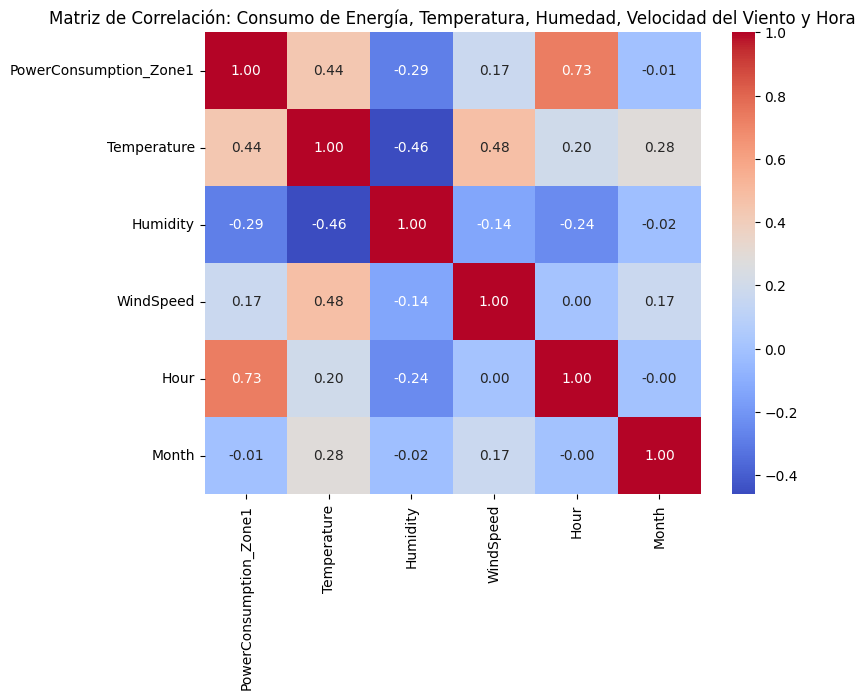

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables que quieres analizar (solo numéricas para la correlación)
variables = ['PowerConsumption_Zone1', 'Temperature', 'Humidity','WindSpeed','Hour', 'Month']
df_correlacion = df[variables]

# Calcular la matriz de correlación
matriz_corr = df_correlacion.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir títulos y etiquetas
plt.title('Matriz de Correlación: Consumo de Energía, Temperatura, Humedad, Velocidad del Viento y Hora')
plt.show()

# Interpretación de la Matriz de Correlación
Se revisa la relación dentre el consumo de energia en la zona 1 para ver la influencia en el consumo y en las correlaciones entre variables predictoras para verificar la independencia.

**Hora** +0.73
Fuerte Positiva. Es el factor continuo más influyente. A medida que avanza el día, el consumo aumenta drásticamente.
Confirma la necesidad de incluir la Hora en el modelo.

Su alto coeficiente justifica que el R2 aumentara significativamente más allá de lo que solo la temperatura podía explicar.

**Temperatura**: +0.44
Moderada Positiva. El consumo aumenta con la temperatura, probablemente por el uso de sistemas de climatización, es un factor primario, aunque no el único.

**Humedad**0.29
Débil a Moderada Negativa. El consumo tiende a disminuir ligeramente a medida que aumenta la humedad. Justifica la inclusión de la Humedad como un factor secundario que aporta información adicional.

**Velocidad del viento **+0.17
Débil Positiva. La relación debil
Sugiere que la Velocidad del Viento aporta poca información lineal por sí sola, pero se mantiene en el modelo al ser una variable meteorológica.

**Mes**−0.01Prácticamente Nula.
Confirma que incluir la variable mes como un número secuencial (1 a 12) es inútil. Esto justifica la necesidad de crear variables como estaciones para capturar los picos de consumo no lineales (Verano/Invierno), lo cual es lo que se hizo en el modelo.

Correlación entre Variables Predictoras (Multicolinealidad)
Es importante que las variables predictoras no estén altamente correlacionadas entre sí para que el modelo sea estable.
•	Correlaciones más altas:
Temperatura vs. Velocidad del viento: +0.48
Temperatura vs. Humedad: −0.46

Los coeficientes entre las variables predictoras son moderados (ninguno supera ±0.8), lo que indica que no hay problemas graves de multicolinealidad. Esto significa que las variables son lo suficientemente independientes como para que cada una aporte valor único a la predicción del consumo de energía.
La adición de la Hora, variables meteorológicas y variables categóricas de tiempo (Día de la Semana, Mes/Estación) elevó el rendimiento del modelo a un  R2 de 0.65.


#Validación Modelo

In [8]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score # Importar KFold y cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# 1. Definición de las variables predictoras (X) y la variable objetivo (y)
# Suponiendo que X y y ya están definidas
# X = df[features]
# y = df['ConsumoDeEnergia_Zona1']

# 2. Creación y Definición del Modelo
model = LinearRegression()

# 3. Definición de la estrategia de Validación Cruzada (K-Fold)
# n_splits es el número de pliegues (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [10]:
# Evaluación del modelo mediante Validación Cruzada K-Fold

# Calcular el R^2 (Coeficiente de Determinación) para cada pliegue
# El scoring por defecto para LinearRegression es 'r2'
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Calcular el MSE (Error Cuadrático Medio) para cada pliegue
# La función cross_val_score retorna un valor NEGATIVO para los errores, por convención.
# Debemos tomar el negativo de la media para obtener el valor positivo del MSE.
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

In [11]:
# Presentar los resultados
print(f"Resultados de la Validación Cruzada K-Fold (k={k}):")
print(f"R^2 por pliegue: {r2_scores}")
print(f"R^2 Promedio: {r2_scores.mean():.4f}")
print(f"Desviación Estándar de R^2: {r2_scores.std():.4f}")

print("-" * 30)

print(f"MSE por pliegue: {mse_scores}")
print(f"MSE Promedio: {mse_scores.mean():.2f}")
print(f"Desviación Estándar de MSE: {mse_scores.std():.2f}")

Resultados de la Validación Cruzada K-Fold (k=5):
R^2 por pliegue: [0.65100643 0.65007395 0.64666973 0.64691881 0.6409152 ]
R^2 Promedio: 0.6471
Desviación Estándar de R^2: 0.0035
------------------------------
MSE por pliegue: [17622216.04807237 18062561.76434468 17994451.30997089 18059665.41080949
 17952445.39479694]
MSE Promedio: 17938267.99
Desviación Estándar de MSE: 163360.14


Coeficiente de Determinación (R2): El valor promedio es 0.6471 (o 64.71%). El modelo de regresión lineal múltiple explica el 64.71% de la variabilidad total en el consumo de energía de la Zona 1.

Consistencia: El valor es muy cercano al R 2 de 0.65 obtenido en la evaluación inicial.

Desviación Estándar de R 2: El valor de 0.0035 la desviación estándar tan baja indica que el rendimiento del modelo estable y robusto; no depende del subconjunto específico de datos que se utilice para entrenar o probar. El modelo generaliza bien.

Error Cuadrático Medio (MSE)
El valor promedio es 17938267.99. Este valor representa la magnitud del error de predicción al cuadrado del modelo, promediado a través de los cinco pliegues.

Consistencia: El MSE promedio es similar al MSE de 17622216.05 obtenido en la evaluación inicial.

Desviación Estándar de MSE: El valor de 163360.14 es bajo en relación con el valor del MSE promedio (aproximadamente 0.9% del promedio).

Esto confirma la robustez. El error del modelo no varía significativamente cuando se entrena con diferentes particiones de los datos, lo cual es una señal excelente.

El modelo múltiple es un avance significativo porque incorporó el factor dominante de la Hora y utilizó variables categóricas de tiempo, lo que elevó la capacidad predictiva del modelo del 19% al 65%.



#Conclusiones de la revisión y ajuste del modelo

Coeficiente de Determinación (R 2 ): 0.65
Este valor significa que el modelo explica el 65% de la variabilidad en el consumo de energía. Es un avance significativo en comparación con un modelo de regresión lineal simple que solo usa la temperatura el cual tenía un coeficiente de correlación (r) de 0.4402. El modelo múltiple que incluye variables como la  Hora, la Estación y el Día de la Semana mejora notablemente la capacidad de predicción.

Esto demuestra que la adición de variables como la humedad, la velocidad del viento y las variables de tiempo ha mejorado notablemente la capacidad de predicción del modelo del 19% al 65%.

Temperatura (344.24): Por cada grado que aumenta la temperatura, el consumo de energía aumenta en 344.24 unidades, lo que confirma que la temperatura es el factor más influyente.

Humedad (11.84) y Velocidad del Viento (34.42): Aunque tienen un efecto positivo, su impacto es mucho menor que el de la temperatura. Esto es consistente con lo esperado, ya que estos factores también influyen en la sensación térmica y en el uso de sistemas de climatización.

Hora del día (700.77): Factor más influyente. Su alto coeficiente indica que el consumo de energía cambia drásticamente a lo largo del día, lo cual es lógico debido al uso energía durante las horas del día especificas.

Día de la semana (DayOfWeek): Los coeficientes positivos para DayOfWeek_1 (lunes), DayOfWeek_2 (martes) y DayOfWeek_3 (miércoles) sugieren un mayor consumo de energía en los días laborables, en comparación con el domingo (que es el valor de referencia, ya que no tiene un coeficiente).

Los coeficientes negativos para DayOfWeek_4 (jueves), DayOfWeek_5 (viernes) y DayOfWeek_6 (sábado) podrian podrían indicar cambios en los patrones de consumo hacia el final de la semana, como una reducción en oficinas o negocios.

Estación del año (Season): Los coeficientes de las estaciones (con la temporada 1 como referencia) muestran que la Temporada 3 (Season_3) tiene un aumento significativo en el consumo (1481.29), lo que probablemente corresponde al verano, cuando los sistemas de aire acondicionado funcionan al máximo. En contraste, las otras estaciones tienen un menor impacto.
La Validación Cruzada K-Fold confirma que el modelo de regresión lineal múltiple es robusto, estable y confiable.


In [12]:
!pip install dash-bootstrap-components
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.9 MB/s eta 0:00:00


In [13]:
import pandas as pd

In [14]:
%pip install dash

In [15]:
# Convertir la columna 'Datetime' a formato de fecha y hora
df['Datetime'] = pd.to_datetime(df['Datetime'])

#Dashbord Modelo de Consumo de Energía por Zonas

In [16]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Carga y preparación de los datos
# Use the correct path to the dataset
df = pd.read_csv(path + '/powerconsumption.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year'] = df['Datetime'].dt.year # Extract year and add as a new column
df['Hour'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['DayOfWeek'] = df['Datetime'].dt.dayofweek # Extract day of week

# Map hours to intervals
def get_hour_interval(hour):
    if 6 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 17:
        return 'Tarde'
    elif 17 <= hour < 18:
        return 'Anocher'
    else:
        return 'Noche'

df['HourInterval'] = df['Hour'].apply(get_hour_interval)


# Mapeo de números de mes a nombres
month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df['MonthName'] = df['Month'].map(month_names)

# Define las estaciones
def get_season(month):
    if month in [12, 1, 2]: return 'Invierno'
    elif month in [3, 4, 5]: return 'Primavera'
    elif month in [6, 7, 8]: return 'Verano'
    elif month in [9, 10, 11]: return 'Otoño' # Corrected the condition for Autumn
    else: return 'Desconocido' # Added a default case
df['Season'] = df['Month'].apply(get_season)

# Mapeo de números de día de la semana a nombres
day_names = {
    0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'
}
df['DayName'] = df['DayOfWeek'].map(day_names)

# Calculate average daily consumption per zone
daily_avg_consumption = df.groupby(['Year', 'Month', 'Day'])[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().mean().reset_index()
daily_avg_consumption.columns = ['Zone', 'AverageDailyConsumption']

# Calculate average monthly consumption per zone
monthly_avg_consumption = df.groupby(['Year', 'Month'])[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().mean().reset_index()
monthly_avg_consumption.columns = ['Zone', 'AverageMonthlyConsumption']

# Prepare data for solar impact graph (average consumption and solar radiation by hour)
df_solar_impact = df.groupby('Hour')[['GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().reset_index()


# Prepare data for trend graph
# Calculate average daily consumption per zone
df_daily_avg = df.groupby(['Year', 'Month', 'Day'])[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().reset_index()
df_daily_avg['Date'] = pd.to_datetime(df_daily_avg[['Year', 'Month', 'Day']])

# Calculate average weekly consumption per zone
df_weekly_avg = df.groupby(['Year', 'DayOfWeek'])[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().reset_index()

# Calculate average monthly consumption per zone
df_monthly_avg = df.groupby(['Year', 'Month'])[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean().reset_index()
df_monthly_avg['MonthYear'] = pd.to_datetime(df_monthly_avg['Year'].astype(str) + '-' + df_monthly_avg['Month'].astype(str) + '-01')


# Inicializa la aplicación Dash
app = dash.Dash(__name__)

# Define el diseño del dashboard
app.layout = html.Div(children=[
    html.H1(children='Dashboard de Consumo de Energía'),

    # -------------------
    # Gráfico 1: Consumo vs. Temperatura por Hora y Semana
    html.Div([
        html.H2('1. Consumo de Energía vs. Temperatura y Hora'),
        html.Div([
            html.Label('Selecciona un Día de la Semana:'),
            dcc.Dropdown(id='dayofweek-dropdown-1', options=[{'label': name, 'value': day} for day, name in day_names.items()], value=df['DayOfWeek'].min()),
            html.Label('Selecciona un Intervalo de Hora:'),
            dcc.Dropdown(id='hourinterval-dropdown-1', options=[{'label': i, 'value': i} for i in df['HourInterval'].unique()], value=df['HourInterval'].unique()[0]),
            html.Label('Selecciona una Zona:'),
            dcc.Dropdown(id='zone-dropdown-1', options=[{'label': 'Zona 1', 'value': 'PowerConsumption_Zone1'},
                                                       {'label': 'Zona 2', 'value': 'PowerConsumption_Zone2'},
                                                       {'label': 'Zona 3', 'value': 'PowerConsumption_Zone3'}],
                         value='PowerConsumption_Zone1')
        ]),
        dcc.Graph(id='graph-1')
    ]),

    # -------------------
    # Gráfico 2: Consumo de energía vs. Humedad y Viento por Mes
    html.Div([
        html.H2('2. Consumo de energía, Humedad y Viento por Mes'),
        html.Div([
            html.Label('Selecciona una Estación:'),
            dcc.Dropdown(id='season-dropdown-2', options=[{'label': i, 'value': i} for i in df['Season'].unique()], value=df['Season'].unique()[0]),
            html.Label('Selecciona un Mes:'),
            dcc.Dropdown(id='month-dropdown-2', options=[], value=None), # Initialize with empty options and no initial value
            html.Label('Selecciona una Zona:'),
            dcc.Dropdown(id='zone-dropdown-2', options=[{'label': 'Zona 1', 'value': 'PowerConsumption_Zone1'},
                                                       {'label': 'Zona 2', 'value': 'PowerConsumption_Zone2'},
                                                       {'label': 'Zona 3', 'value': 'PowerConsumption_Zone3'}],
                         value='PowerConsumption_Zone1')
        ]),
        dcc.Graph(id='graph-2')
    ]),

    # -------------------
    # Gráfico 3: Consumo por Estación en las 3 Zonas
    html.Div([
        html.H2('3. Consumo de Energía por Estación y Zona'),
        html.Div([
            html.Label('Selecciona un Día de la Semana:'),
            dcc.Dropdown(id='dayofweek-dropdown-3', options=[{'label': name, 'value': day} for day, name in day_names.items()], value=df['DayOfWeek'].min()),
        ]),
        dcc.Graph(id='graph-3')
    ]),
    # Gráfico 4: Tendencias Anuales y Estacionales
    html.Div([
        html.H2('4. Tendencias Anuales y Estacionales del Consumo de Energía'),
        html.Div([
            html.Label('Selecciona una Zona:'),
            dcc.Dropdown(id='zone-dropdown-trend',
                         options=[{'label': 'Zona 1', 'value': 'PowerConsumption_Zone1'},
                                  {'label': 'Zona 2', 'value': 'PowerConsumption_Zone2'},
                                  {'label': 'Zona 3', 'value': 'PowerConsumption_Zone3'}],
                         value='PowerConsumption_Zone1'),
            html.Label('Selecciona el Nivel de Agregación:'),
            dcc.Dropdown(id='aggregation-dropdown',
                         options=[{'label': 'Diario', 'value': 'Daily'},
                                  {'label': 'Semanal', 'value': 'Weekly'},
                                  {'label': 'Mensual', 'value': 'Monthly'}],
                         value='Daily'),
             html.Label('Selecciona el Año:'),
            dcc.Dropdown(id='year-dropdown-trend',
                        options=[{'label': str(year), 'value': year} for year in df['Year'].unique()],
                        value=df['Year'].min()),
        ]),
        dcc.Graph(id='trend-graph')
    ]),
#Gráfico 5: Consumo Promedio por Día de la Semana ---
html.Div([
    html.H2('5. Consumo Promedio por Día de la Semana y Hora'),
    html.Div([
        html.Label('Selecciona un Intervalo de Hora:'),
        dcc.Dropdown(
            id='hourinterval-dropdown-4',
            # Use the correct column name 'HourInterval'
            options=[{'label': i, 'value': i} for i in df['HourInterval'].unique()],
            value='Tarde' # Valor por defecto
        ),
        html.Label('Selecciona una Zona:'),
        dcc.Dropdown(
            id='zona-dropdown-4',
            options=[
                {'label': 'Zona 1', 'value': 'PowerConsumption_Zone1'},
                {'label': 'Zona 2', 'value': 'PowerConsumption_Zone2'},
                {'label': 'Zona 3', 'value': 'PowerConsumption_Zone3'}
            ],
            value='PowerConsumption_Zone1' # Valor por defecto
        ),
    ]),
    dcc.Graph(id='graph-4')
]),
# --------------------------------------------------------------------

])

# Callback para actualizar las opciones del dropdown de mes basado en la estación
@app.callback(
    Output('month-dropdown-2', 'options'),
    [Input('season-dropdown-2', 'value')]
)
def update_month_dropdown(selected_season):
    if selected_season is None:
        return []
    # Get the months corresponding to the selected season
    months_in_season = df[df['Season'] == selected_season]['Month'].unique()
    # Sort months and create options for the dropdown
    return [{'label': month_names[month], 'value': month} for month in sorted(months_in_season)]


# Callback 1 para el Gráfico 1
@app.callback(
    Output('graph-1', 'figure'),
    [Input('dayofweek-dropdown-1', 'value'),
     Input('hourinterval-dropdown-1', 'value'),
     Input('zone-dropdown-1', 'value')]
)
def update_graph_1(selected_dayofweek, selected_hourinterval, selected_zone):
    filtered_df = df[(df['DayOfWeek'] == selected_dayofweek) & (df['HourInterval'] == selected_hourinterval)]
    fig = px.scatter(
        filtered_df, # Use the filtered dataframe
        x='Temperature',
        y=selected_zone,
        color='Hour', # Keep color by individual hour for more detail within interval
        title=f'Consumo de energía vs. Temperatura por Hora en {selected_zone} ({day_names[selected_dayofweek]}, {selected_hourinterval})',
        labels={'Temperature': 'Temperatura (°C)', selected_zone: 'Consumo (Wh)', 'Hour': 'Hora del Día'},
        trendline='ols'
    )
    return fig

# Callback 2 para el Gráfico 2
@app.callback(
    Output('graph-2', 'figure'),
    [Input('month-dropdown-2', 'value'),
     Input('season-dropdown-2', 'value'),
     Input('zone-dropdown-2', 'value')]
)
def update_graph_2(selected_month, selected_season, selected_zone):
    if selected_month is None: # Handle case where no month is selected yet
        return {}
    filtered_df = df[(df['Month'] == selected_month) & (df['Season'] == selected_season)]
    fig = px.scatter(
        filtered_df,
        x='Humidity',
        y=selected_zone,
        size='WindSpeed',
        color='Temperature',
        hover_name='Datetime',
        title=f'Consumo de energía, Humedad y Viento en {selected_zone} en {month_names[selected_month]} ({selected_season})',
        labels={'Humidity': 'Humedad (%)', selected_zone: 'Consumo (Wh)', 'WindSpeed': 'Velocidad del Viento (km/h)'}
    )
    return fig

# Callback 3 para el Gráfico 3
@app.callback(
    Output('graph-3', 'figure'),
    [Input('dayofweek-dropdown-3', 'value')] # Add dayofweek-dropdown-3 as input
)
def update_graph_3(selected_dayofweek):
    # Filter the dataframe by the selected day of the week
    filtered_df = df[df['DayOfWeek'] == selected_dayofweek]

    # Combina los datos de las tres zonas en un solo DataFrame para el gráfico de caja
    df_melt = filtered_df.melt(id_vars=['Season'], # Use the filtered dataframe
                     value_vars=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
                     var_name='Zone',
                     value_name='PowerConsumption')

    fig = px.box(
        df_melt,
        x='Season',
        y='PowerConsumption',
        color='Zone',
        points='all',
        title=f'Consumo de Energía por Estación en las 3 Zonas ({day_names[selected_dayofweek]})',
        labels={'Season': 'Estación', 'PowerConsumption': 'Consumo (Wh)', 'Zone': 'Zona'}
    )
    return fig


# Callback for the Trend Graph
@app.callback(
    Output('trend-graph', 'figure'),
    [Input('zone-dropdown-trend', 'value'),
     Input('aggregation-dropdown', 'value'),
     Input('year-dropdown-trend', 'value')]
)
def update_trend_graph(selected_zone, selected_aggregation, selected_year):
    if selected_aggregation == 'Daily':
        agg_df = df_daily_avg
        x_col = 'Date'
        title_prefix = 'Daily Average'
    elif selected_aggregation == 'Weekly':
        # For weekly, we plot DayOfWeek for the selected year
        agg_df = df_weekly_avg[df_weekly_avg['Year'] == selected_year]
        x_col = 'DayOfWeek'
        title_prefix = 'Weekly Average'
    elif selected_aggregation == 'Monthly':
        agg_df = df_monthly_avg[df_monthly_avg['Year'] == selected_year]
        x_col = 'MonthYear'
        title_prefix = 'Monthly Average'
    else:
        return {} # Return empty figure if no aggregation is selected

    # Filter by year if aggregation is weekly or monthly
    if selected_aggregation in ['Weekly', 'Monthly']:
         agg_df = agg_df[agg_df['Year'] == selected_year]

    fig = px.line(
        agg_df,
        x=x_col,
        y=selected_zone,
        title=f'{title_prefix} Power Consumption Trend for {selected_zone} in {selected_year}',
        labels={x_col: selected_aggregation, selected_zone: 'Consumo (Wh)'}
    )

    # Improve x-axis for weekly plot if needed (e.g., use day names)
    if selected_aggregation == 'DayOfWeek': # Changed from 'Weekly' to 'DayOfWeek' to match x_col
         fig.update_layout(
             xaxis = dict(
                 tickmode = 'array',
                 tickvals = list(day_names.keys()),
                 ticktext = list(day_names.values())
             )
         )


    return fig

# Dictionary to correctly order days of the week
# Assumes 0: Monday, ..., 6: Sunday
nombres_del_dia = {
    0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: "Domingo"
} # [cite: 303]

@app.callback(
    Output('graph-4', 'figure'),
    [Input('hourinterval-dropdown-4', 'value'),
     Input('zona-dropdown-4', 'value')]
)
def update_graph_4(intervalo_seleccionado, zona_seleccionada):
    if not intervalo_seleccionado:
        return {} # Return empty graph if no selection

    # 1. Filter data by the selected hour interval
    df_filtrado = df[df['HourInterval'] == intervalo_seleccionado]

    # 2. Calculate average consumption by day of the week for the selected zone
    # Use 'DayOfWeek' (numeric value 0-6) for sorting, and 'DayName' for the label
    # Use the 'DayOfWeek' column created in the notebook preprocessing [cite: 85]
    df_agrupado = df_filtrado.groupby(['DayOfWeek', 'DayName'])[zona_seleccionada].mean().reset_index()

    # 3. Create the bar graph
    fig = px.bar(
        df_agrupado,
        x='DayName',
        y=zona_seleccionada,
        color='DayName', # Use the day as color to differentiate
        title=f'Consumo Promedio por Día de la Semana en {zona_seleccionada} durante la {intervalo_seleccionado}',
        labels={zona_seleccionada: 'Consumo Promedio (Wh)', 'DayName': 'Día de la Semana'},
    )

    # Ensure correct order of days of the week
    dia_orden = list(nombres_del_dia.values())
    fig.update_xaxes(categoryarray=dia_orden, categoryorder='array')

    return fig


# Ejecutar el servidor
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

**Conclusión**

El proceso desarrollado en el Jupyter Notebook se centra en el análisis de la relación entre la Temperatura y el Consumo de Energía en la Zona 1, inicialmente mediante una regresión lineal simple y luego a través de un modelo de regresión lineal múltiple para mejorar la predicción.

El análisis inicial se enfocó en probar la siguiente hipótesis:

H 0: No existe una relación significativa entre la temperatura y el consumo de energía en la zona 1.

Resultado del Test: Se rechazó la hipótesis nula (H 0 ).

El P-valor obtenido fue prácticamente cero (0.00000000). Dado que este valor es mucho menor que el nivel de significancia común de 0.05, se concluye que la relación observada no es resultado del azar y es estadísticamente significativa.

Existe una relación positiva entre la temperatura y el consumo de energía, indicada por una pendiente (slope) de 539.7704. Esto significa que, por cada unidad que aumenta la temperatura (por ejemplo, 1 grado), el consumo de energía aumenta en 539.7704 unidades.

El coeficiente de correlación (r) fue de 0.4402, lo que sugiere una correlación positiva moderada. Esto implica que, si bien la temperatura influye, no es el único factor determinante en el consumo de energía.

Se desarrolló un modelo más robusto incluyendo múltiples variables predictoras (Temperature, Humidity, WindSpeed, Month, Hour, DayOfWeek y Season).

Coeficiente de Determinación (R 2): 0.65.
El modelo de regresión lineal múltiple explica el 65% de la variabilidad en el consumo de energía de la Zona 1. Este valor, aunque no es perfecto, representa una mejora significativa respecto a un modelo simple.

Impacto de las Variables (Coeficientes)
Los coeficientes del modelo indican el impacto de cada variable en el consumo de energía de la Zona 1:

Temperatura (Temperature): 344.2388
La temperatura sigue siendo el predictor más fuerte y positivo entre las variables meteorológicas. Un aumento en la temperatura se asocia directamente con un mayor consumo de energía (posiblemente por el uso de aire acondicionado).

Hora (Hour): 700.7741
 La hora del día tiene el mayor coeficiente positivo de todos los predictores, lo que sugiere que el patrón horario es el factor más influyente en el consumo de energía (ej. mayor actividad en horas pico).

Estación  (Season_3): 1481.2920

La Estación 3 (probablemente el verano, dado el contexto del dataset y la alta correlación con la temperatura) se asocia con el mayor aumento en el consumo base de energía.

Fin de Semana (DayOfWeek_6): −1780.8386

El coeficiente negativo y de gran magnitud para el día 6 de la semana (domingo) indica una reducción considerable en el consumo de energía durante este día, lo que es lógico para zonas de consumo asociadas a la actividad laboral o comercial.

El  proceso de desarrollo confirmó una relación significativa entre la temperatura y el consumo de energía y demostró que la inclusión de variables temporales (Hour, DayOfWeek, Season) resulta en un modelo de predicción sustancialmente más preciso (R 2 =0.65).

Al desarrollar los dashboard se busco  convertir los complejos resultados del modelo de regresión en una herramienta visual y accesible.

El dashboard es la interfaz de comunicación que valida el trabajo técnico lo cual permitio:

Permite presentar la conclusión principal del modelo (el R 2) =0.65 y la importancia de las variables temporales como Hour y Season no como números abstractos, sino como gráficos de tendencias y comparaciones fáciles de interpretar.

En lugar de solo mostrar el código, se puede utilizar el dashboard para simular predicciones (What-if scenarios) validando de forma inmediata la precisión del modelo.

Donde se obtuvo alto Impacto Temporal	Gráficos de barras que muestran el consumo promedio por Hora y Día de la Semana (picos en ciertas horas, caídas en el domingo).	La gestión de la demanda debe enfocarse en los patrones operativos diarios más que solo en el clima.

La Temperatura es un Factor Significativo	Gráfico de dispersión o feature importance que muestra que la Temperatura es el predictor meteorológico dominante.	Permite a los gestores prepararse para los aumentos de consumo relacionados con el verano (Season 3), planificando la capacidad.


Al ser el  dashboard interactivo, permite filtrar datos por mes, temporada o día. Esto hace que el análisis sea más relevante para sus preguntas específicas y demuestra la robustez del modelo.


Demuestra la capacidad de llevar un proyecto de ciencia de datos hasta su etapa final de producción y consumo de insights, lo cual es fundamental en el ámbito laboral.
